# Principal Component Analysis
#### Ing. Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod: 2312660. Facultad de Ingenieria de Sistemas. USTA.

References:
1. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

2. https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Principal-Components-Rotation

Hasta este momento hemos visto con:

1. Linear Regression
2. Naive Bayes
3. Forest Regresion
4. SVM

Metodos de clasificacion o estimacion que se basan en procesos supervisados, es decir que los datos de enseanza continen etiquetas, Aqui con el Analizis de Componentes principales o PCA, empezamos a conocer los sistemas no supervisados, es decir, que no necesitan de datos previamente etiquetas para su entrenamiento.

PCA es fundamentalmente un algoritmo de reducción de dimensionalidad, pero también puede ser útil como herramienta para visualización, filtrado de ruido, extracción de características e ingeniería, y mucho más. 

Empecemos por importar las librerias estandar para este trabajo

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from IPython.display import Image

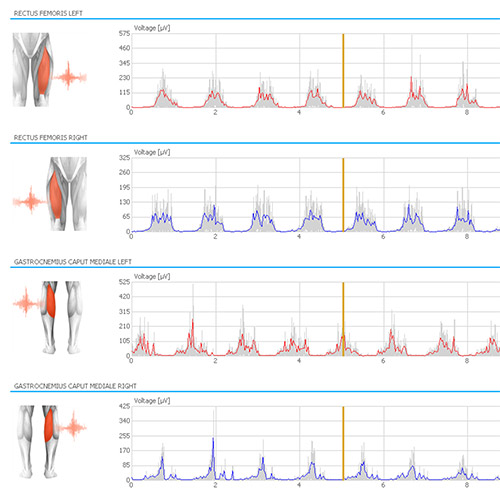

In [36]:
Image("PAC_EMG_2.jpg")

Una de las posibles aplicaciones electronicas como filtrado de ruido de una señal EMG


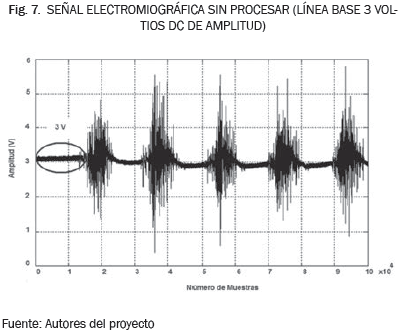

In [35]:
# http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S1692-17982013000100009
print("Una de las posibles aplicaciones electronicas como filtrado de ruido de una señal EMG")
Image("PCA_señalEMG.gif")

El análisis de componentes principales es un método no supervisado rápido y flexible para la reducción de la dimensionalidad de los datos.
Su comportamiento es más fácil de visualizar mirando un conjunto de datos bidimensional.

Observemos los isguientes 200 puntos:

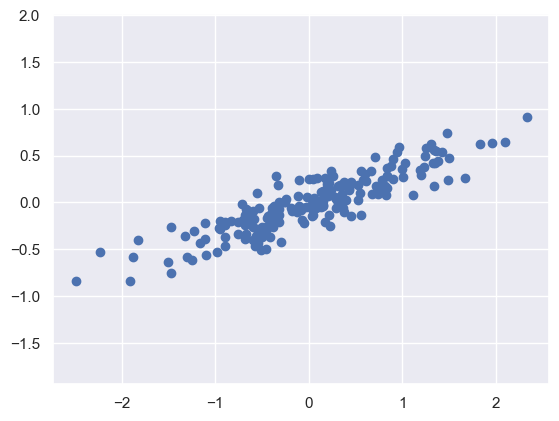

In [4]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

A simple vista, está claro que existe una relación casi lineal entre las variables x e y. Esto es una reminiscencia de los datos de regresión lineal.

Pero la configuración del problema aquí es ligeramente diferente: en lugar de intentar predecir los valores de y a partir de los valores de x, el problema de aprendizaje no supervisado intenta aprender sobre la relación entre los valores de x e y.

En el análisis de componentes principales, esta relación se cuantifica **encontrando una lista de los ejes principales en los datos** y usando esos ejes para describir el conjunto de datos. 

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [6]:
print("Los componentes son: ",pca.components_)

Los componentes son:  [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [7]:
print("La varianza es: ",pca.explained_variance_)

La varianza es:  [0.7625315 0.0184779]


Para ver qué significan estos números, visualicémoslos como vectores sobre los datos de entrada, usando los "componentes" para definir la dirección del vector y la "varianza explicada" para definir la longitud al cuadrado del vector:

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

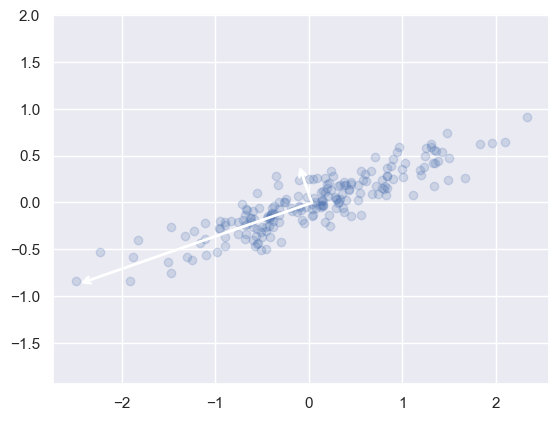

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

Estos vectores representan los ejes principales de los datos, y la longitud del vector es una indicación de cuán "importante" es ese eje para describir la distribución de los datos; más precisamente, es una medida de la varianza de los datos cuando se proyectan. sobre ese eje. 

La proyección de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.

Si trazamos estos componentes principales junto a los datos originales, vemos los gráficos que se muestran aquí:

In [9]:
from sklearn.decomposition import PCA

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

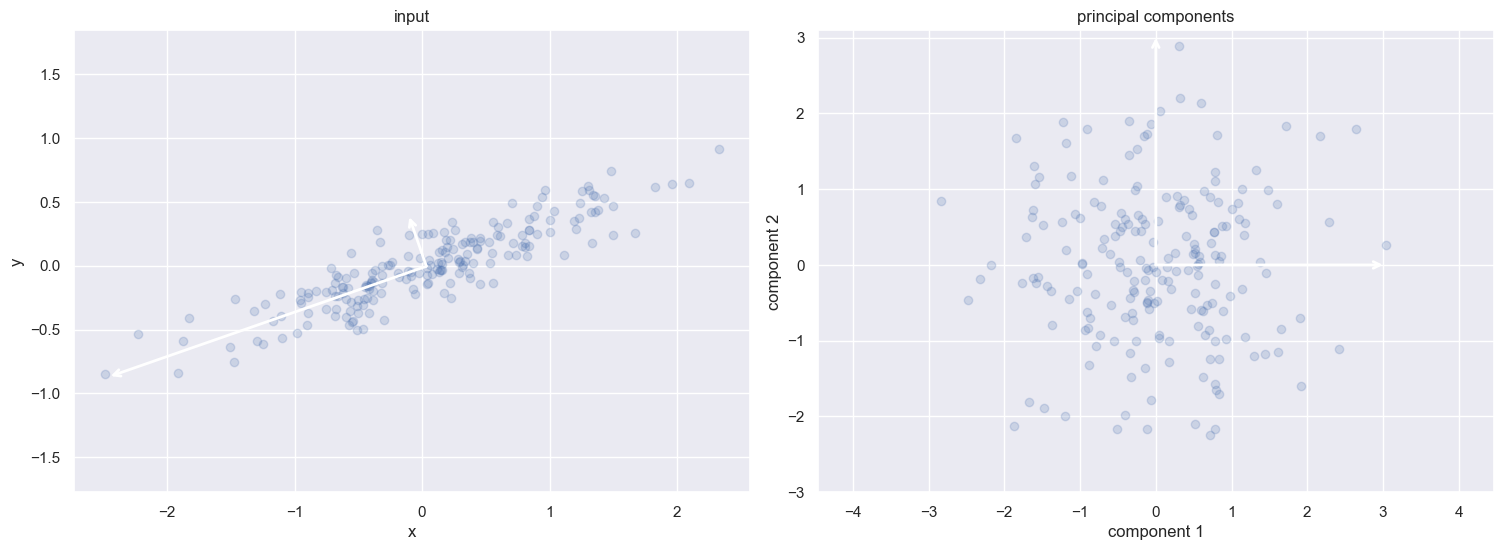

In [11]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

fig.savefig('05.09-PCA-rotation.png')

Esta transformación de ejes de datos a ejes principales es una transformación afín , lo que básicamente significa que se compone de traslación, rotación y escalado uniforme.

Si bien este algoritmo para encontrar los componentes principales puede parecer solo una curiosidad matemática, resulta que tiene aplicaciones de gran alcance en el mundo del aprendizaje automático y la exploración de datos.

### PCA: Reduccion de dimencionalidad

Esta implica poner un cero, un uno o mas componentes principales mas pequeños, dando como resultado una proyeccion de menor dimension de los datos que conserven la variacion maxima de los datos.

Por ejemplo podemos ver lo siguiente:

In [12]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Los datos transformados se han reducido a una sola dimensión. Para comprender el efecto de esta reducción de dimensionalidad, podemos realizar la transformada inversa de estos datos reducidos y representarlos junto con los datos originales:

(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389316,
 1.0060642308539953)

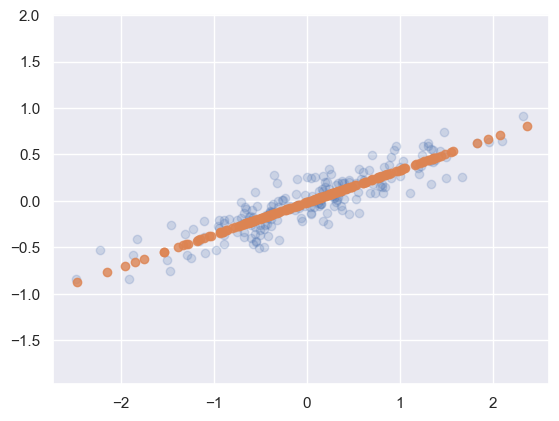

In [13]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

Puntos $Azules$ => datos originales

Puntos $Naranja$ => version proyectada con PCA

Esto aclara lo que significa una reducción de dimensionalidad de PCA: la información a lo largo del eje o ejes principales menos importantes se elimina, dejando solo los componentes de los datos con la varianza más alta. 

La fracción de varianza que se elimina (proporcional a la dispersión de puntos sobre la línea formada en esta figura) es aproximadamente una medida de cuánta "información" se descarta en esta reducción de dimensionalidad.

Este conjunto de datos de dimensión reducida es, en algunos sentidos, "lo suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos en un 50 %, la relación general entre los puntos de datos se conserva en su mayor parte.

### PCA: Digitos escritos a Mano :v

Puede ser dificil evidenciar un trabajo con PCA al trabajar con tan solo dos dimenciones, pero es muy conveniente cuando se trata de dats de alta dimencion.

Veamos su uso en la clasificacion de digitos que fueron escritos a mano.


In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Los datos que traemos consisten en un banco de imagenes, donde cada imagen tiene un tamaño de 8x8 pixeles, lo que significa que tienen 64 dimenciones.

Para ganar algo de intuición en las relaciones entre estos puntos, podemos usar PCA para proyectarlos a un número más manejable de dimensiones, digamos dos:

In [15]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Ahora tratemos de graficar los dos primeros componentes principales de cada punto para conocer estos datos, de la siguiente forma:


In [ ]:
"""
# Codigo con error

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
"""

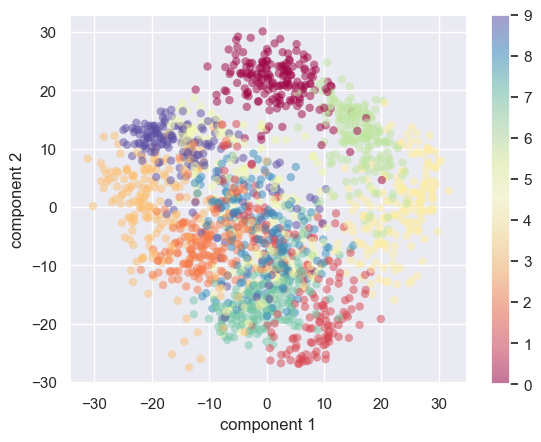

In [26]:
import matplotlib.cm

cmap  = cm.get_cmap('Spectral')

plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, 
            cmap = cmap)

# cmap = cm.get_cmap(base_cmap, N) => basemap = colores => N numero de colores
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Recuerde lo que significan estos componentes: los datos completos son una nube de puntos de 64 dimensiones, y estos puntos son la proyección de cada punto de datos a lo largo de las direcciones con la mayor variación.

Recuerde lo que significan estos componentes: los datos completos son una nube de puntos de 64 dimensiones, y estos puntos son la proyección de cada punto de datos a lo largo de las direcciones con la mayor variación.

## ¿Que son los componentes en PCA?

Ahora podemos ir un poco mas alla y comenzar a preguntarnos que significan las dimensiones reducidas.

Este ignificado puede entenderse en términos de combinaciones de vectores base. Por ejemplo, cada imagen en el conjunto de entrenamiento está definida por una colección de valores de 64 píxeles, que llamaremos el vector $X$

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Una forma en que podemos pensar en esto es en términos de píxeles. Es decir, para construir la imagen, multiplicamos cada elemento del vector por el píxel que describe y luego sumamos los resultados para construir la imagen:

$This >(°u°)>$

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

Una forma en que podríamos imaginar reducir la dimensión de estos datos es poner a cero todos menos algunos de estos vectores base. Por ejemplo, si usamos solo los primeros ocho píxeles, obtenemos una proyección de ocho dimensiones de los datos, pero no refleja mucho la imagen completa: ¡hemos descartado casi el 90% de los píxeles!

In [27]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

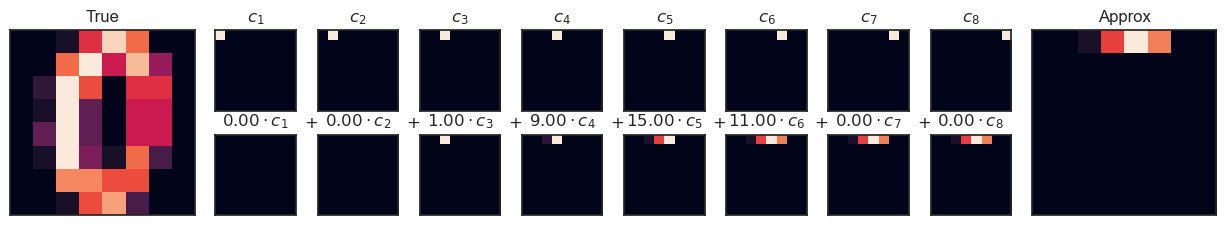

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10],
                          show_mean=False)

fig.savefig('05.09-digits-pixel-components.png')

La fila superior de paneles muestra los píxeles individuales y la fila inferior muestra la contribución acumulada de estos píxeles a la construcción de la imagen. Usando solo ocho de los componentes basados ​​en píxeles, solo podemos construir una pequeña porción de la imagen de 64 píxeles. Si continuáramos con esta secuencia y usáramos los 64 píxeles, recuperaríamos la imagen original.

Pero la representación en píxeles no es la única opción de base. También podemos usar otras funciones básicas, cada una de las cuales contiene una contribución predefinida de cada píxel, y escribir algo como lo que podemos ver acontinuacion:

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

Se puede pensar en PCA como un proceso de elección de funciones base óptimas, de modo que sumar solo las primeras es suficiente para reconstruir adecuadamente la mayor parte de los elementos en el conjunto de datos. 

Los componentes principales, que actúan como la representación de baja dimensión de nuestros datos, son simplemente los coeficientes que multiplican cada uno de los elementos de esta serie.

Esta figura muestra una representación similar de la reconstrucción de este dígito utilizando la media más las primeras ocho funciones de base PCA:

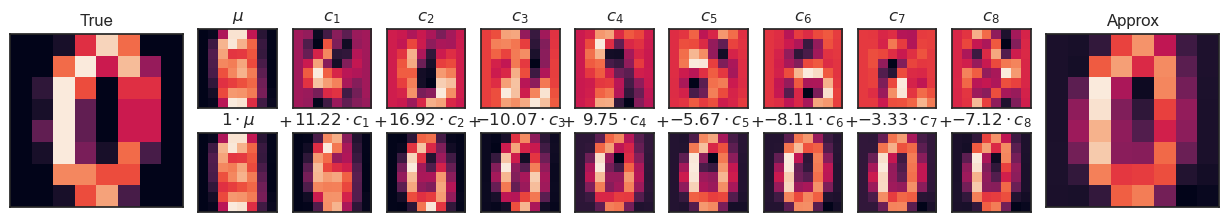

In [29]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)

fig.savefig('05.09-digits-pca-components.png')

A diferencia de la base de píxeles, la base de PCA nos permite recuperar las características más destacadas de la imagen de entrada con solo una media más ocho componentes.

La cantidad de cada píxel en cada componente es el corolario de la orientación del vector en nuestro ejemplo bidimensional. Este es el sentido en el que PCA proporciona una representación de baja dimensión de los datos: descubre un conjunto de funciones básicas que son más eficientes que la base de píxeles nativa de los datos de entrada.

### PCA: Para definir el numero de componentes

Una parte en la que es muy usado el PCA es en la capacidad que tiene este en la estimacion de cuantos componentes necesitamos para describir un banco de datos.

esto lo logramos determinar observando la relacion de varianza acumulada explicada como una funcion del numero de componentes.

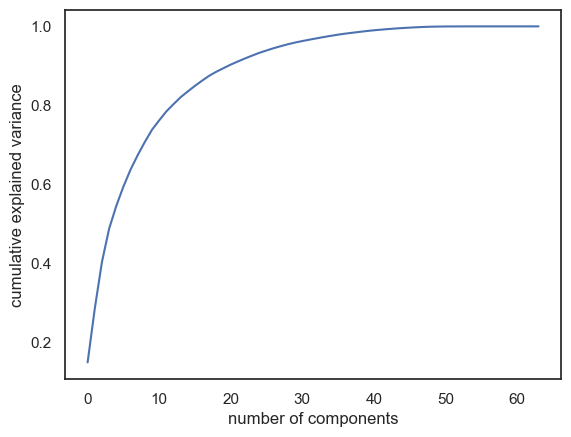

In [30]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Esta curva cuantifica la variacion total de las 64 dimencioines que estan contenidad en los primeros $N$ componentes.

Por ejemplo,  vemos que con los dígitos los primeros 10 componentes contienen aproximadamente el 75 % de la varianza, mientras que necesita alrededor de 50 componentes para describir cerca del 100 % de la varianza.

Aquí vemos que nuestra proyección bidimensional pierde mucha información y que necesitaríamos alrededor de 20 componentes para retener el 90 % de la varianza.

### PCA: Filtro de Ruido

PCA también se puede utilizar como un enfoque de filtrado para datos ruidosos. La idea es esta: cualquier componente con una variación mucho mayor que el efecto del ruido no debería verse afectado por el ruido. Entonces, si reconstruye los datos utilizando solo el subconjunto más grande de componentes principales, debería mantener preferentemente la señal y descartar el ruido.

Veamos cómo se ve esto con los datos de los dígitos. Primero trazaremos varios de los datos de entrada libres de ruido:

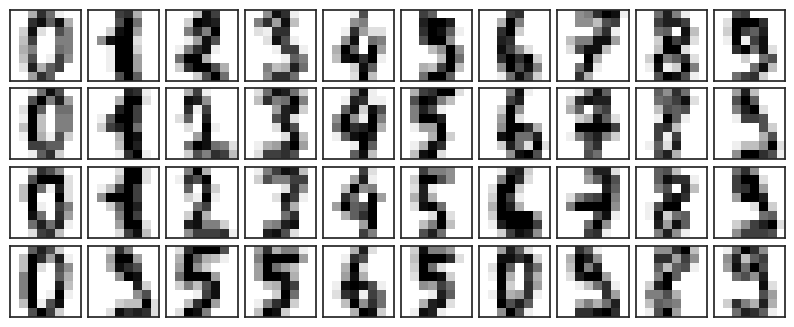

In [42]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ahora agreguemos algo de ruido aleatorio para crear un conjunto de datos ruidoso y volver a trazarlo:

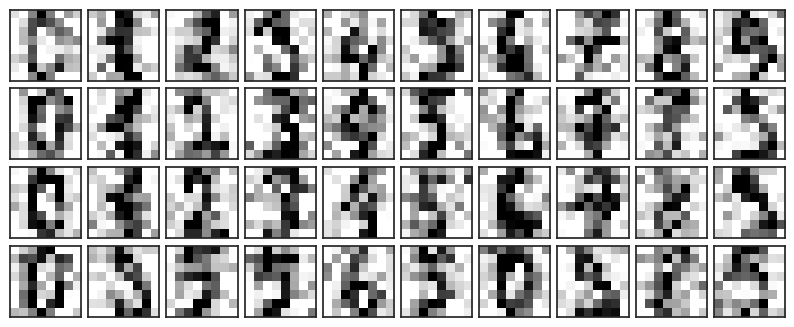

In [43]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Como podemos observar a simple vista, cada una de las anteriores imagenes de digitos tienen mucho mas ruido que las originales, teniendo pixeles falsos.

Entrenemos un PCS en los datos ruidosos, solicitandoles que conserve el 50% de varianza a ver que nos arroja.

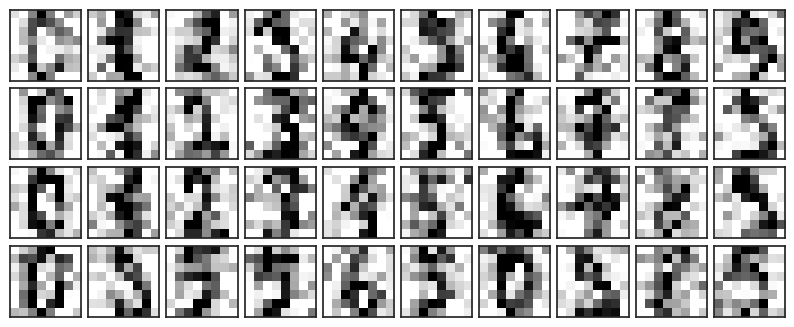

In [44]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

En este caso no filtro como deberia esperarce pero debiera salir un resultado similar al siguiente:

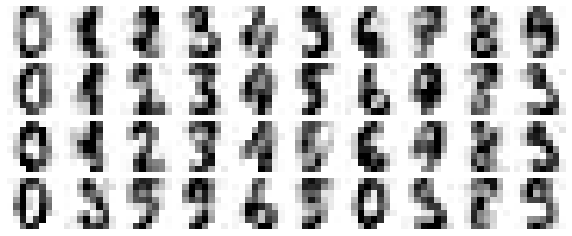

In [45]:
Image("descarga.png")

Esta propiedad de filtrado de ruido/preservación de señal hace que PCA sea una rutina de selección de características muy útil; por ejemplo, en lugar de entrenar un clasificador en datos de dimensiones muy altas, puede entrenar al clasificador en la representación de dimensiones más bajas, que servirá automáticamente para filtrar eliminar el ruido aleatorio en las entradas.

### Ventajas

Hemos visto que PCA nos sirve para:

1. reduccion de la dimensionalidad.
2. para la visualizacion de datos de alta dimension.
3. para el filtrado de ruido.
4. para la seleccion de caracteristicas dentro de datos de alta dimencion.

Es eficaz en una amploa variedad de conextos y disciplinas.

Dado cualquier conjunto de datos de alta dimensión, tiendo a comenzar con PCA para visualizar la relación entre puntos (como hicimos con los dígitos), comprender la variación principal en los datos (como hicimos con las caras propias) y comprender la dimensionalidad intrínseca (trazando la relación de varianza explicada). 


### Deventajas

Ciertamente, PCA no es útil para todos los conjuntos de datos de alta dimensión, pero ofrece una ruta directa y eficiente para obtener información sobre los datos de alta dimensión.

La principal debilidad de PCA es que tiende a verse muy afectada por valores atípicos en los datos. Por esta razón, se han desarrollado muchas variantes robustas de PCA, muchas de las cuales actúan para descartar iterativamente puntos de datos que están mal descritos por los componentes iniciales.

1. SCIKIT LEARN RandomizedPCA
2. SCIKIT LEARN SparsePCA

